In [2]:
#importing the essentials

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/sarthakchawla/Downloads/shootings.csv.xls')

# <font color="violet"><b>Let's take a look at the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [5]:
data.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera          arms_category  
0  Not fleeing        False                   Guns  
1  Not fleeing        False                   Guns  
2  Not fleeing        False                Unarmed  
3  Not fleeing        False  Other unusual objects  
4  Not fleeing        False       Piercing objects

# <font color="violet"><b>Preprocess

In [6]:
#Mengelompokkan golongan berdasarkan umur
bins = [0,18,45,60,100]
group_names = ['Teenager','Adult','Old','Very Old']
data['Age Group'] = pd.cut(data['age'], bins, labels= group_names)

#convert data tanggal dari string ke date
data['date']=pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['month_year']= pd.to_datetime(data['date']).dt.to_period('M')

count_year= data.groupby(['year']).agg('count')['id'].to_frame(name='count').reset_index()

#drop kejadian yang terjadi pada 2020
data = data[data.year != 2020]
data.head()

id                name       date   manner_of_death       armed   age  \
0   3          Tim Elliot 2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera          arms_category Age Group  year  month  \
0  Not fleeing        False                   Guns       Old  2015      1   
1  Not fleeing        False                   Guns       Old  2015      1   
2  Not fleeing        False                Unarmed     Adult  2015      1   
3  Not fleeing        False  Other unusual objects     Adult  2015      1   
4  Not fleeing        False       Piercing objects     Adult  2015      1   

  month_year  
0    2015-01  
1    2015-01  
2    2015-01  
3    2015-01  
4    2015-01

# <font color="violet"><b>**Killings by Year**

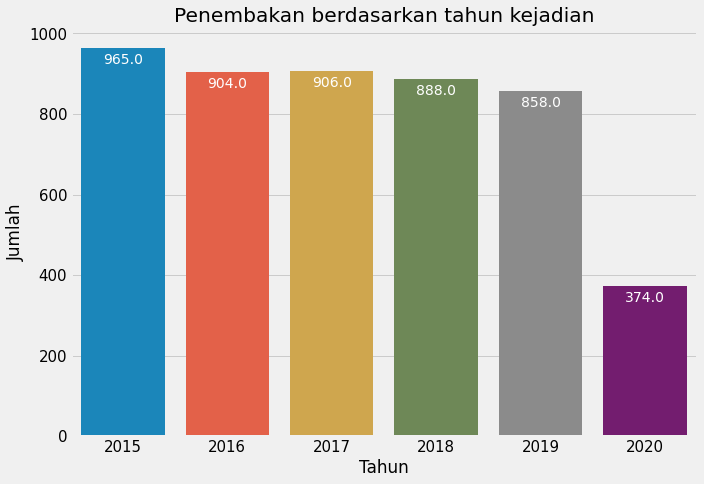

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
splot = sns.barplot(x=count_year['year'], y=count_year['count'], data=count_year)
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Penembakan berdasarkan tahun kejadian')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='white', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

# <font color="violet"><b> Killings by Month

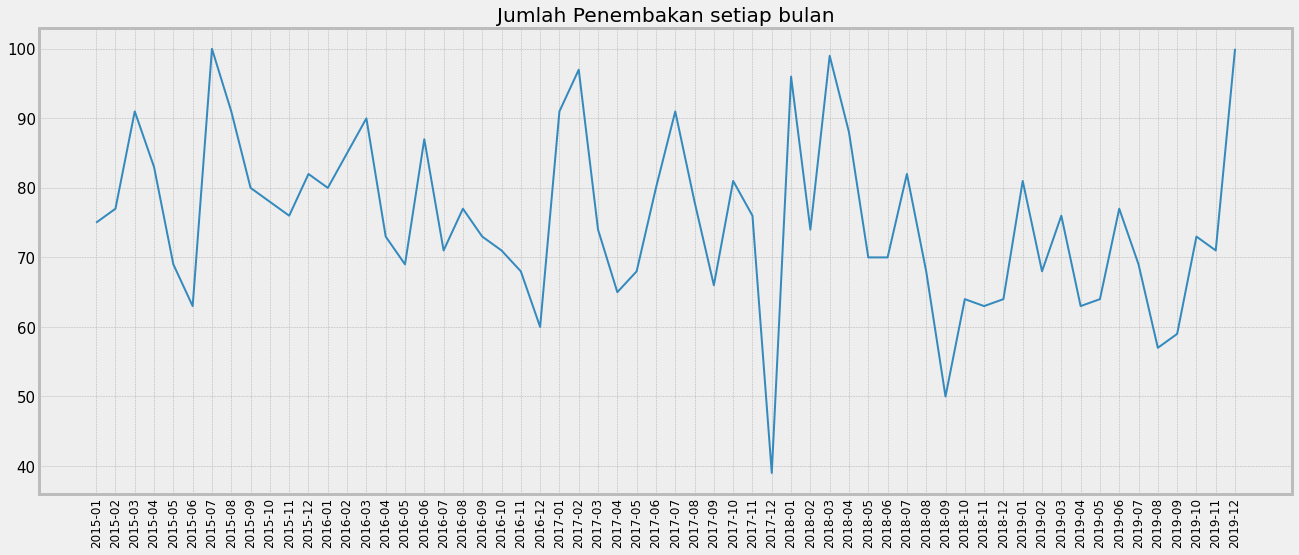

In [8]:
plt.style.use('bmh')
data['month_year']= data.month_year.astype(str)
line_chart = data.groupby(['month_year']).agg('count')['id'].to_frame(name='count').reset_index()
plt.figure(figsize=(20,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.plot(line_chart['month_year'],line_chart['count'])
plt.title('Jumlah Penembakan setiap bulan')
plt.xticks(ticks = line_chart['month_year'],rotation=90)
plt.show()

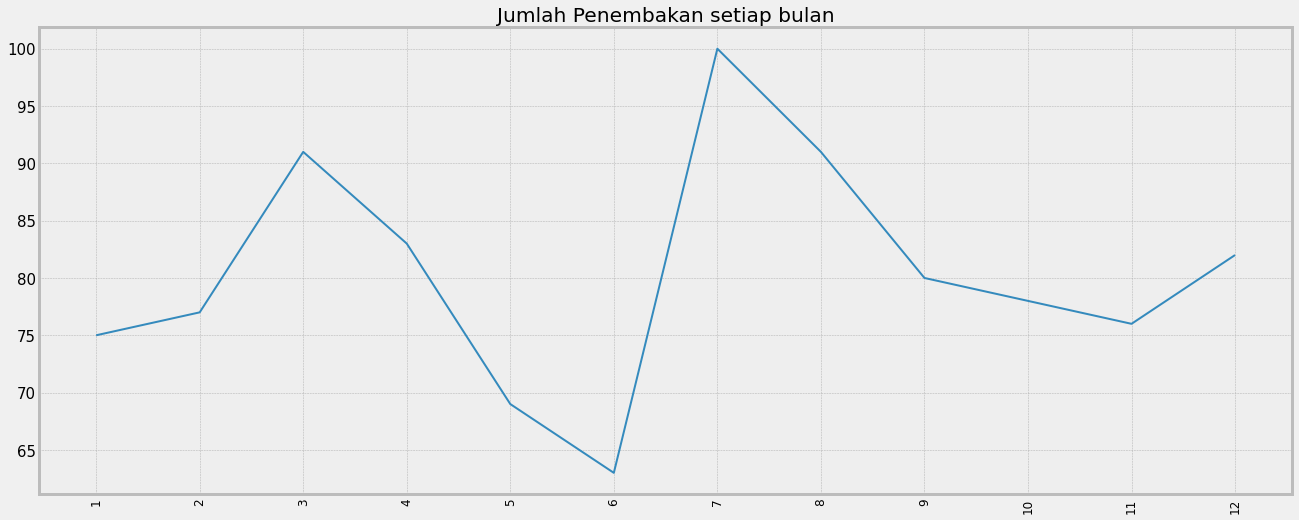

In [9]:
plt.style.use('bmh')
line_chart = data[data.year == 2015].groupby(['month']).agg('count')['id'].to_frame(name='count').reset_index()
plt.figure(figsize=(20,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.plot(line_chart['month'],line_chart['count'])
plt.title('Jumlah Penembakan setiap bulan')
plt.xticks(ticks = line_chart['month'],rotation=90)
plt.show()

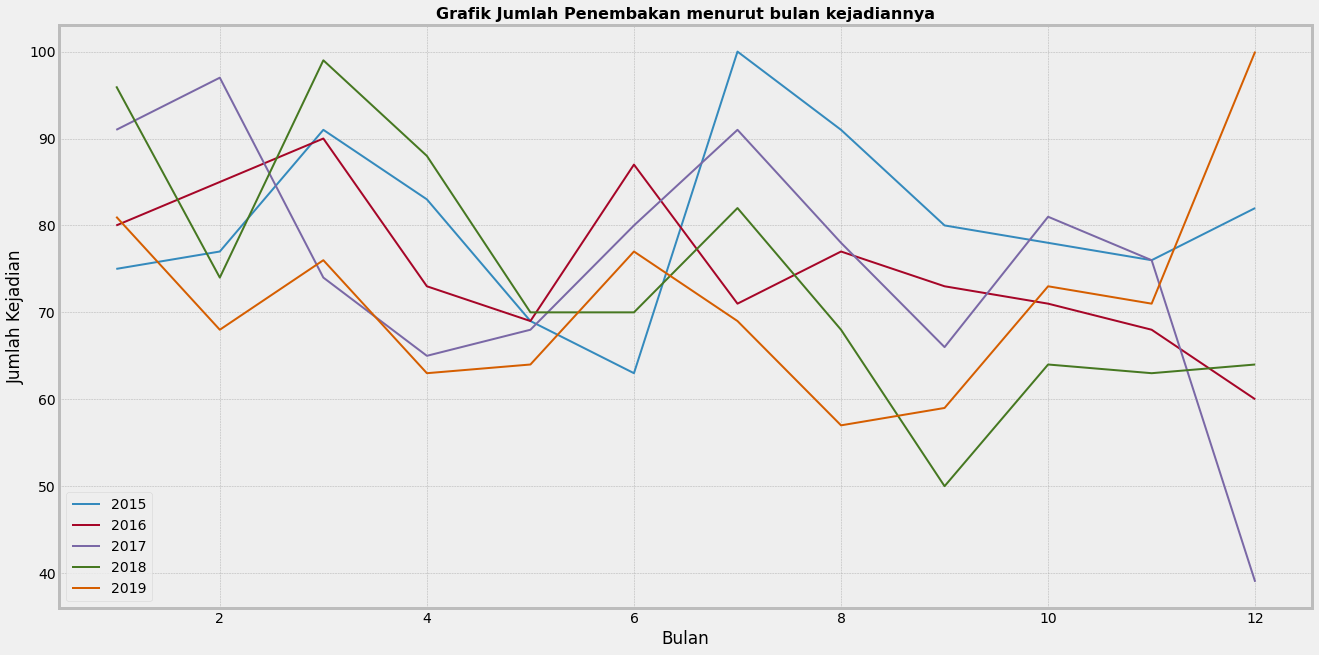

In [9]:
data2015 = data[data.year == 2015].groupby(['month']).agg('count')['id'].to_frame(name='count').reset_index()
data2016 = data[data.year == 2016].groupby(['month']).agg('count')['id'].to_frame(name='count').reset_index()
data2017 = data[data.year == 2017].groupby(['month']).agg('count')['id'].to_frame(name='count').reset_index()
data2018 = data[data.year == 2018].groupby(['month']).agg('count')['id'].to_frame(name='count').reset_index()
data2019 = data[data.year == 2019].groupby(['month']).agg('count')['id'].to_frame(name='count').reset_index()

plt.figure(figsize=(20,10))
plt.plot(data2015['month'],data2015['count'], label=2015)
plt.plot(data2016['month'],data2016['count'], label=2016)
plt.plot(data2017['month'],data2017['count'], label=2017)
plt.plot(data2018['month'],data2018['count'], label=2018)
plt.plot(data2019['month'],data2019['count'], label=2019)
# Add title and x, y labels
plt.title("Grafik Jumlah Penembakan menurut bulan kejadiannya", fontsize=16, fontweight='bold')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kejadian")
# Add legend
plt.legend(loc='lower left')
plt.show()

In [10]:
line_chart.columns = ['Month_Year', 'Victim_Count']
max_1 = pd.DataFrame(line_chart[line_chart.Victim_Count == line_chart.Victim_Count.max()].reset_index(drop=True))
min_1 = pd.DataFrame(line_chart[line_chart.Victim_Count == line_chart.Victim_Count.min()].reset_index(drop=True))
print('Jumlah Penembakan paling banyak terjadi pada bulan\n',max_1)
print('**********************************************')
print('Jumlah Penembakan paling sedikit terjadi pada bulan\n',min_1)

Jumlah Penembakan paling banyak terjadi pada bulan
    Month_Year  Victim_Count
0           7           100
**********************************************
Jumlah Penembakan paling sedikit terjadi pada bulan
    Month_Year  Victim_Count
0           6            63


In [11]:
avg_shot_per_day = (count_year['count'][0:5].sum())/(365*5)
print('Avg death count per day',avg_shot_per_day)

Avg death count per day 2.4772602739726026


In [12]:
avg_per_month = (count_year['count'][0:5].sum())/(12*5)
print('Avg death count per month',avg_per_month)

Avg death count per month 75.35


In [13]:
shot_or_taser = data.groupby(['Age Group','manner_of_death']).agg('count')['id'].to_frame(name='count').reset_index()
shot_or_taser = shot_or_taser.rename(columns = {'manner_of_death':'Manner of Death', 0:'Count'})
shot_or_taser = shot_or_taser.sort_values(by=['count'],ascending=False)

# <font color="violet"><b>Killings by Age Category

/Users/sarthakchawla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


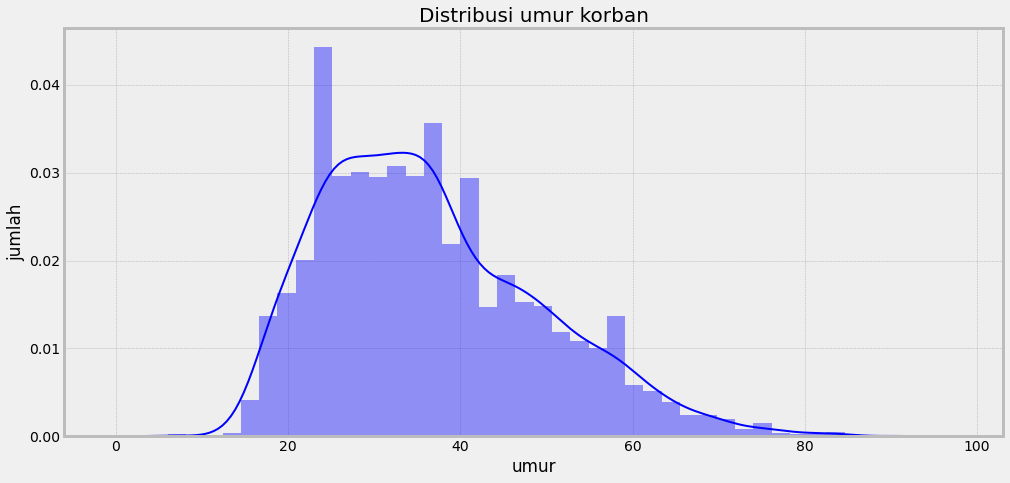

In [14]:
plt.rcParams['figure.figsize']= (15,7)
sns.distplot(data['age'], color='blue')
plt.title('Distribusi umur korban', fontsize=20)
plt.xlabel('umur')
plt.ylabel('jumlah')
plt.show()

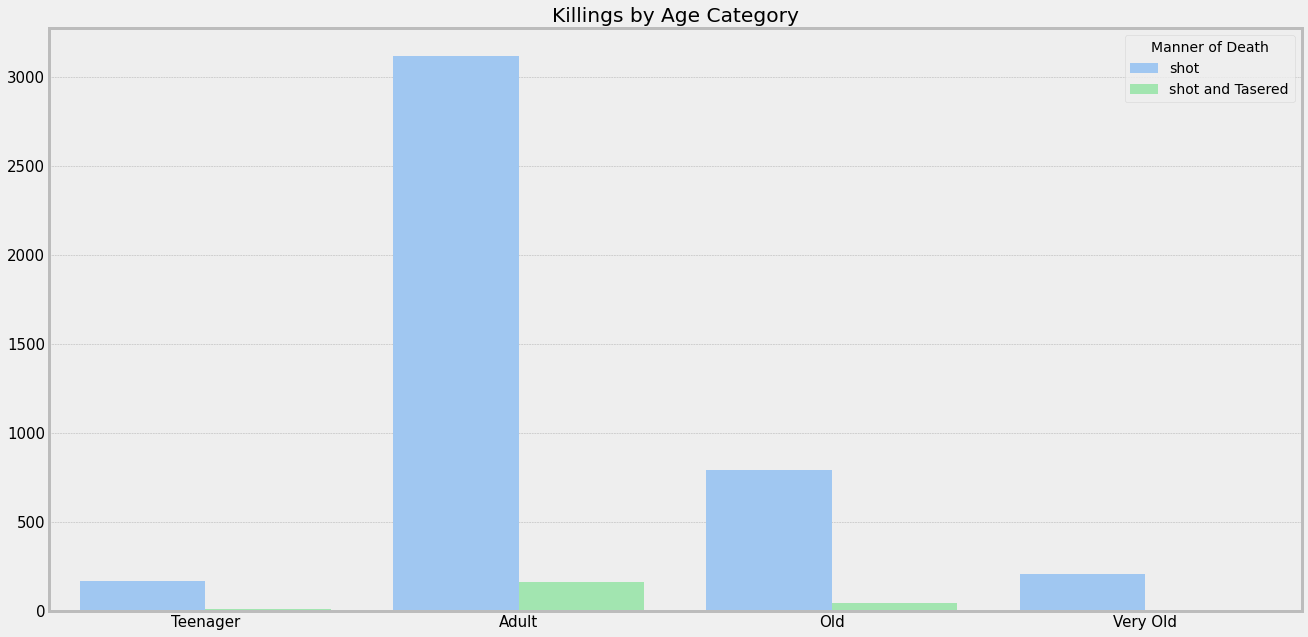

In [15]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,10))
sns.barplot(x="Age Group", y="count",hue="Manner of Death", data=shot_or_taser)
plt.xlabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Killings by Age Category')
plt.ylabel("")

plt.show()

* The data points are not clear because the Shot count is comparatively very high. Let's check it on Log scale

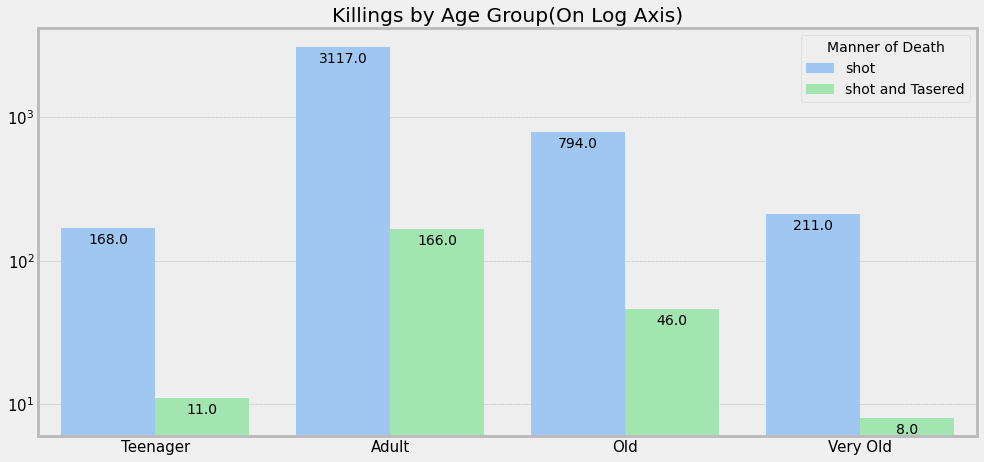

In [16]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(15,7))
agecat = sns.barplot(x="Age Group", y="count",hue="Manner of Death", data=shot_or_taser,log=True)
plt.xlabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Killings by Age Group(On Log Axis)')
plt.ylabel("")
for p in agecat.patches:
    agecat.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

* We can see that shot as well as Shot and Tasered both types are highest in Adult Category

# <font color="violet"><b>Shot or Tasered(in Percentages)

In [17]:
a=shot_or_taser.groupby(['Age Group']).sum().reset_index()

list_percent = []
total = a['count']
temp = 0
temp_2 = 0
for i in range(4):
    for j in range(2):
        per=(shot_or_taser['count'][temp])/total[temp_2]
        list_percent.append(per)
        temp=temp+1
    temp_2=temp_2+1

list_1 = ['Shot','Shot and Tasered']
teenager = list_percent[0:2]
adult = list_percent[2:4]
old = list_percent[4:6]
very_old = list_percent[6:8]

Let's Analyse by Age Category

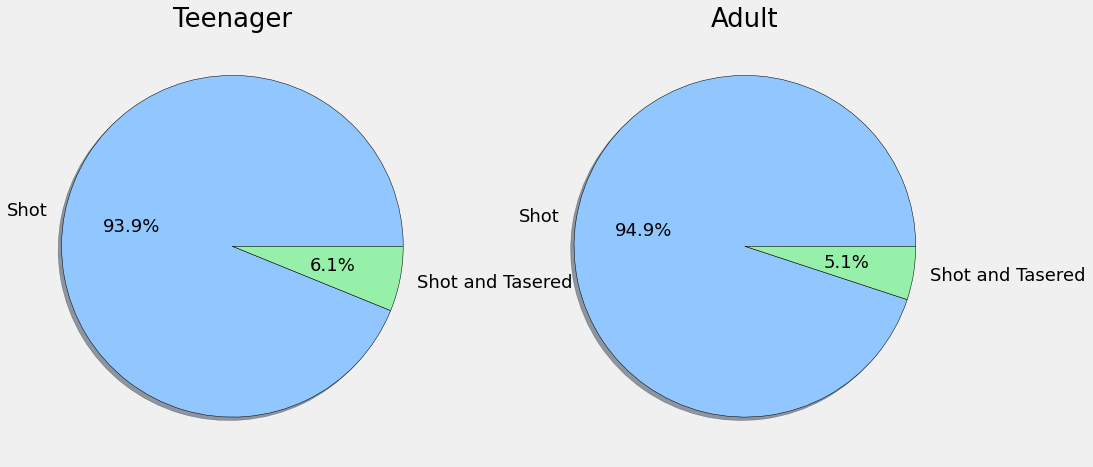

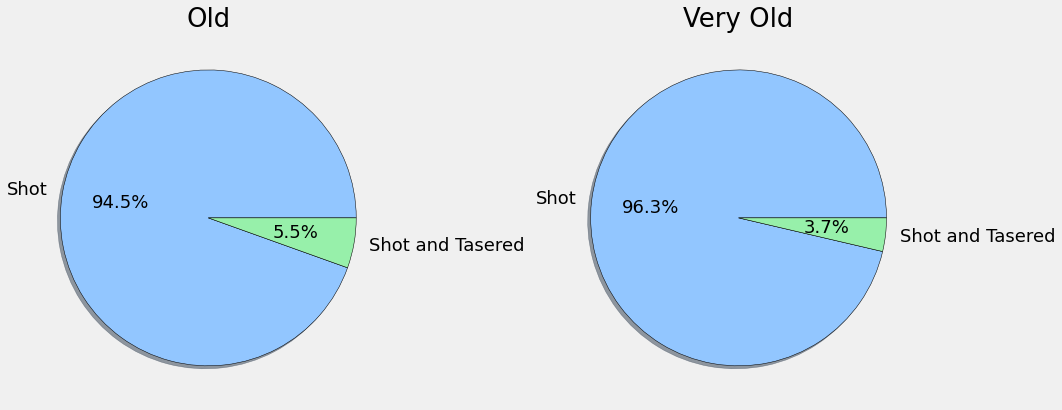

In [18]:
#For Teenager and Adult
plt.style.use('seaborn-pastel')
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,15))
fig, (ax3,ax4) = plt.subplots(1,2, figsize = (15,15))
plt.rcParams.update({'font.size': 18})
ax1.pie(teenager, labels=list_1, shadow=True, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

ax2.pie(adult, labels=list_1, shadow=True, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
ax3.pie(old, labels=list_1, shadow=True, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
ax4.pie(very_old, labels=list_1, shadow=True, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
ax1.set_title("Teenager")
ax2.set_title("Adult")
ax3.set_title("Old")
ax4.set_title("Very Old")
fig.tight_layout()
plt.show()

* Looks like that tasers are used comparatively less in case of Very old people
* Let's Look at the actual data points

## <font color="violet"><b>Actual Data points (manner of death by year by Age)

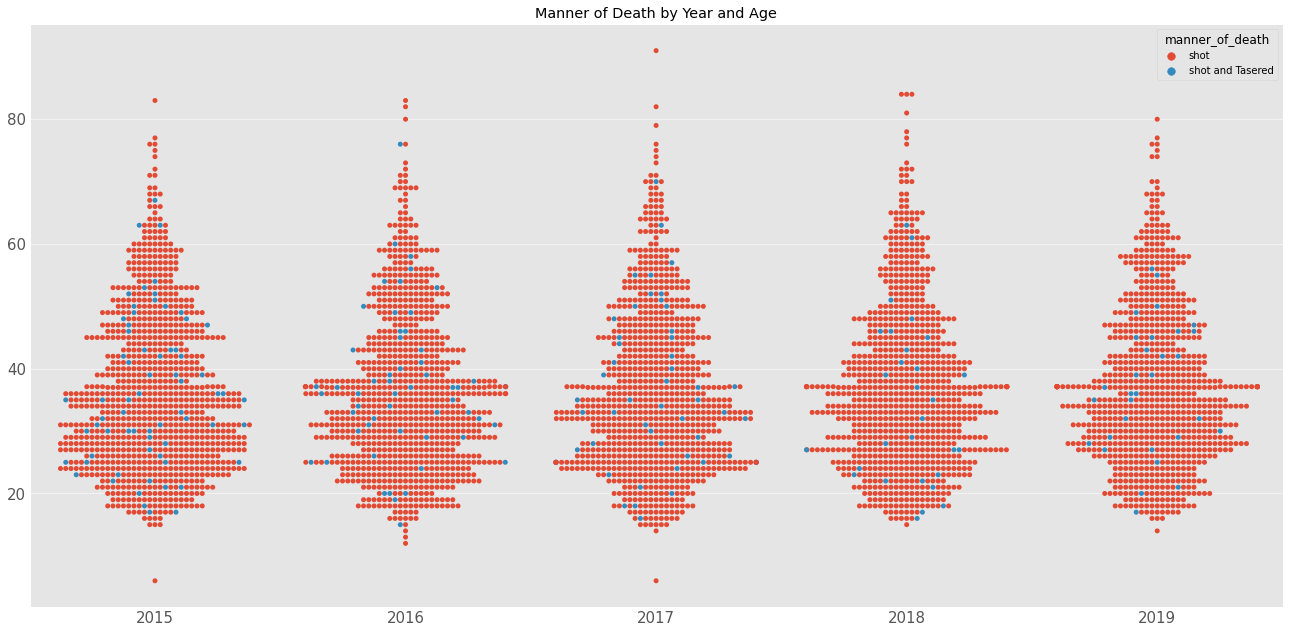

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.swarmplot(data=data, x="year", y="age",hue="manner_of_death")
plt.xlabel("")
plt.ylabel("")
plt.title('Manner of Death by Year and Age')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

* It looks like that the numbers of Shot and Tasered people are comparatively less than previous years, let's confirm that by checking the data

* We can see that not only Shot and Taseres but also Shot category is getting less year by year[](http://)

## <font color="violet"><b>Bersenjata atau tidak?

In [20]:
#finding top 5(what ammunitions used)

armed_or_not=data.groupby(['armed']).size()
armed_or_not=armed_or_not.sort_values()
armed_or_not = armed_or_not.to_frame().reset_index()
armed_or_not = armed_or_not.rename(columns={'armed':'Armed', 0:'Count'})
armed_or_not = armed_or_not.sort_values(by = ['Count'],ascending=False)
top_5= armed_or_not.head(5)

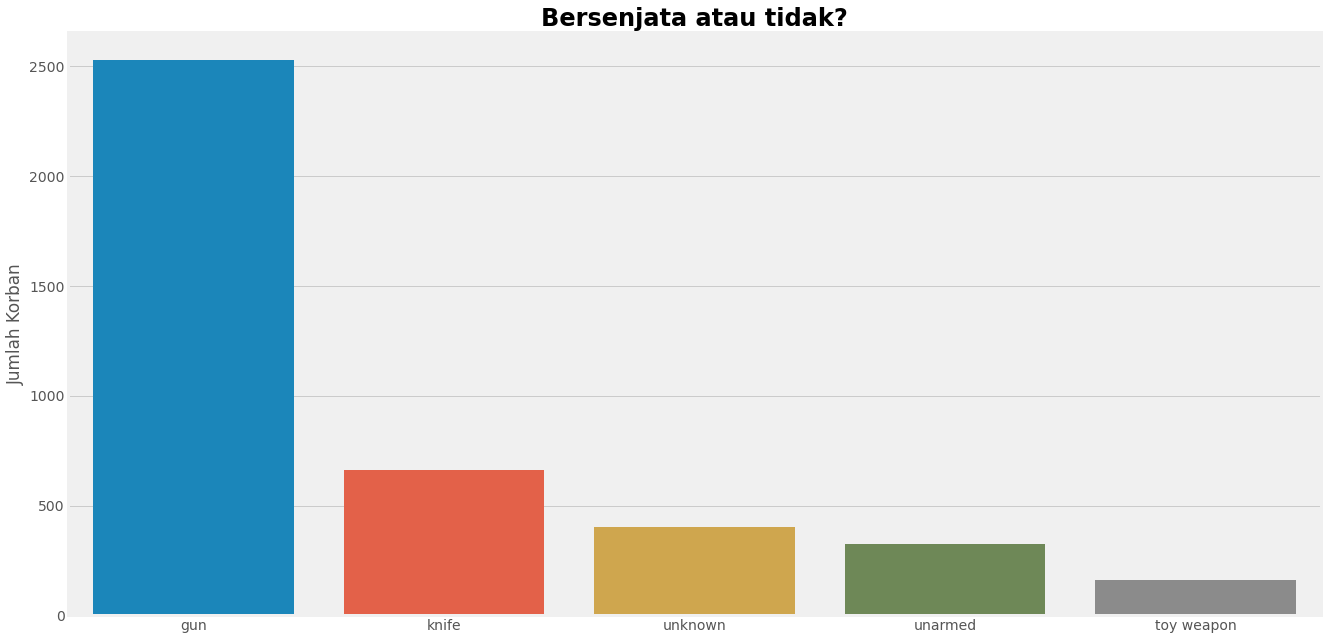

In [21]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.bar(top_5.Armed,top_5.Count)
sns.barplot(x='Armed', y='Count', data=top_5)
plt.title('Bersenjata atau tidak?', fontsize=24, fontweight='bold')
plt.ylabel('Jumlah Korban')
plt.xlabel('')
plt.show()

* We can see clearly that majority people had gun, probably becaause of the lenient Arms laws in the U.S
* Let's take a clear picture with help of Pie Chart by summarising all other weapons in an Other Category

In [22]:
records = data.shape[0]
armed_or_not_pie = armed_or_not.head(4)
list_p = []
for i in (range(len(armed_or_not_pie))):
    temp=(armed_or_not_pie['Count'].values[i]/records)*100
    list_p.append(temp)

Others_p= 100-sum(list_p)
percentages=pd.Series(list_p)
armed_or_not_pie['percent'] = percentages.values
armed_or_not_pie.drop('Count',axis=1,inplace=True)
Others_df = ['Others',Others_p]
other_series = pd. Series(Others_df, index = armed_or_not_pie.columns)
armed_or_not_pie = armed_or_not_pie. append(other_series, ignore_index=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


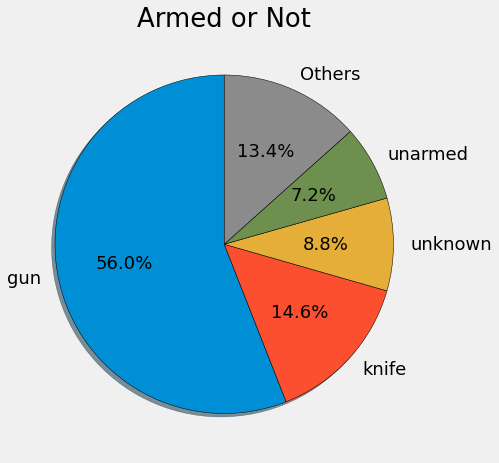

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 18})
plt.pie(armed_or_not_pie['percent'], labels=armed_or_not_pie['Armed'], shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("Armed or Not")
plt.tight_layout()
plt.show()

* 56.3% people were armed with Gun, and then we have 14.5 people who were armed with Knife
* Others category include all other categories except top 4

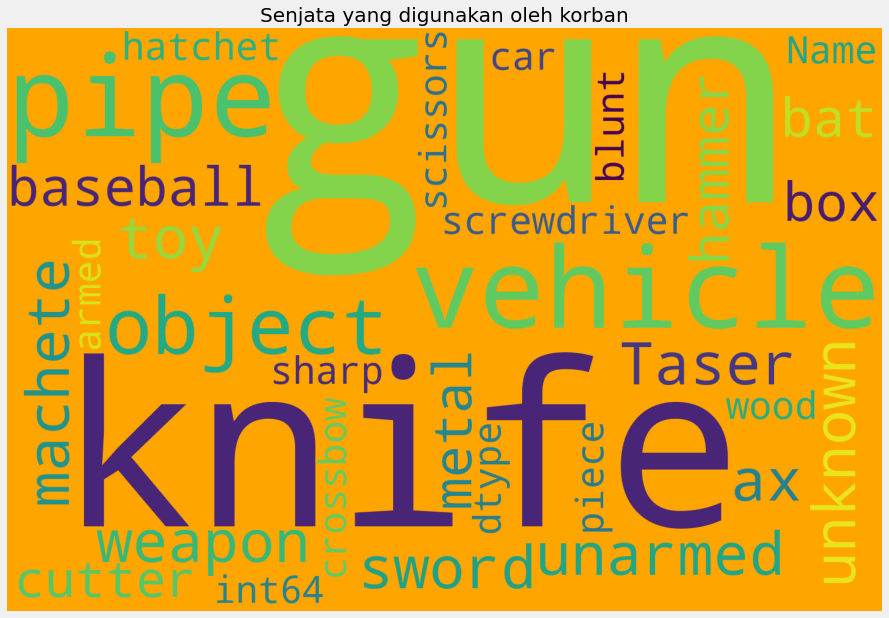

In [24]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1000).generate(str(data['armed'].value_counts().head(25)))
plt.title('Senjata yang digunakan oleh korban', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

# <font color="violet"><b>Gender Wise Killings per Year

In [19]:
#Gender Ratio
df=data['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
fig = go.Figure([go.Pie(labels=['Pria', 'Wanita'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Rasio Korban Penembakan berdasarakn Jenis Kelamin",title_x=0.5)
fig.show()

In [20]:
#full df
gender_shoot = data.groupby(['year','gender']).agg('count')['id'].to_frame(name='count').reset_index()

#for Male
male = gender_shoot.loc[gender_shoot['gender']=='M']

#for Female
female = gender_shoot.loc[gender_shoot['gender']=='F']

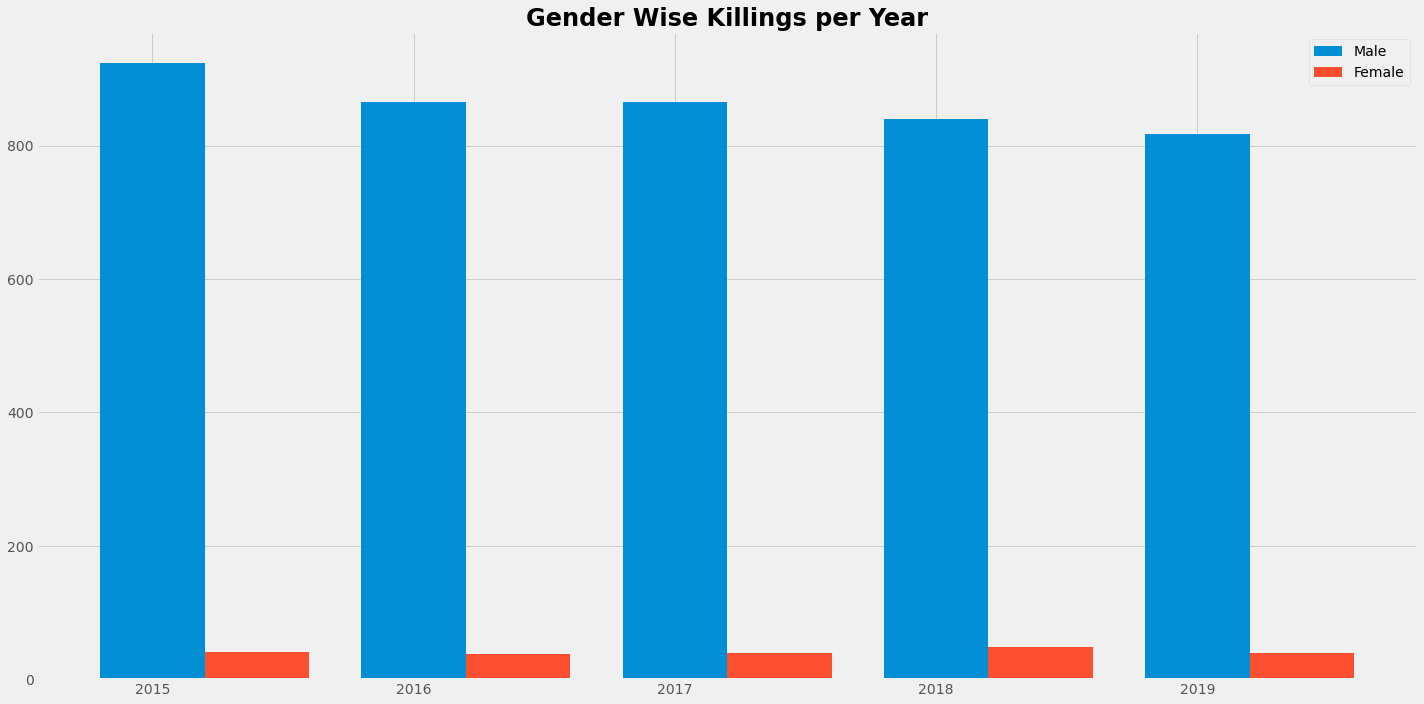

In [27]:
#plotting the data
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
x_indexes = np.arange(len(male['year']))
width = 0.40

plt.bar( x_indexes,male['count'],width = width,label = 'Male')
plt.bar( x_indexes+width,female['count'],width = width, label = 'Female')
plt.title('Gender Wise Killings per Year', fontsize=24, fontweight='bold')
plt.xticks(ticks = x_indexes, labels = female['year'])
plt.tight_layout()
plt.legend()
plt.show()

* If we talk about killings by gender, then we can see that Men count is much larger than women

## <font color="violet"><b>Killings By Age Group

In [21]:
df =data.groupby(['Age Group','gender']).agg('count')['id'].to_frame(name='count').reset_index()
df=df.sort_values(by=['count'],ascending=False)

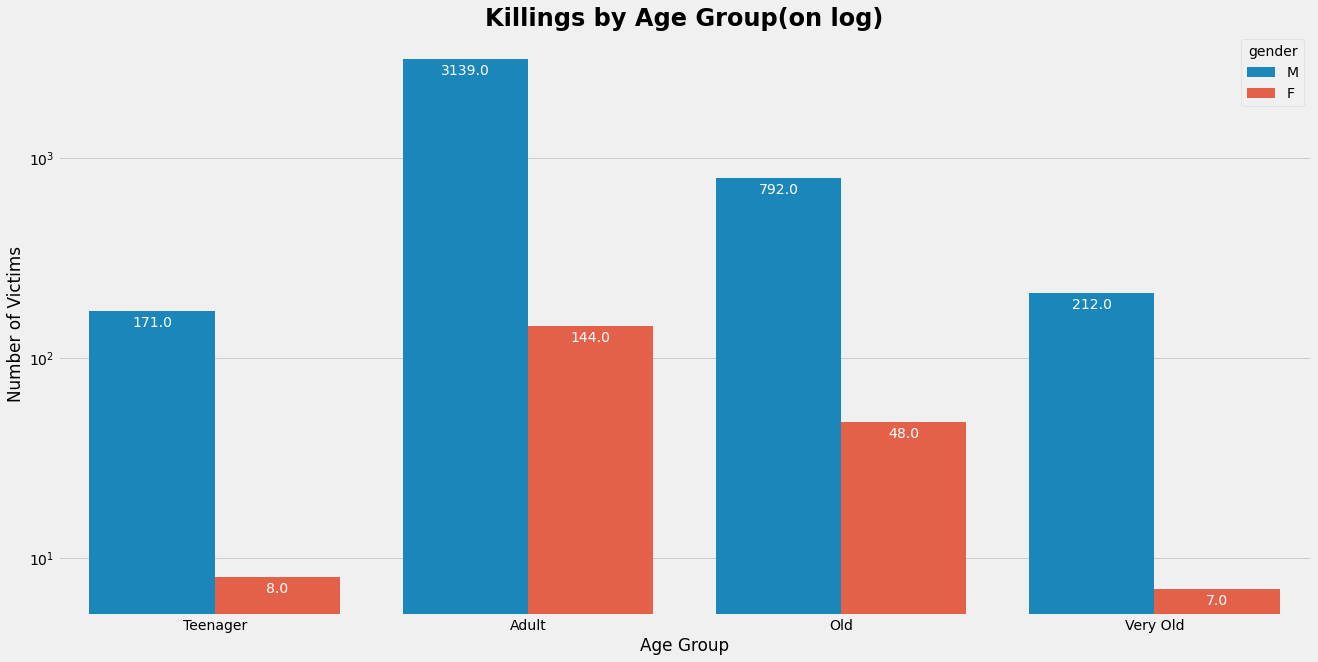

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
agegender = sns.barplot(x='Age Group', y='count', hue='gender', data=df,log=True)
plt.title('Killings by Age Group(on log)', fontsize=24, fontweight='bold')
plt.ylabel('Number of Victims')
for p in agegender.patches:
    agegender.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='white', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

# <font color="violet"><b>Penembakan berdasarkan Ras

In [24]:
df =data.groupby(['Age Group','gender']).agg('count')['id'].to_frame(name='count').reset_index()
df=df.sort_values(by=['count'],ascending=False)

* Most people belong to Adult Category, let's take a closer look by including Gender into picture on log scale

In [25]:
race_df = data.groupby(['year','race']).agg('count')['id'].to_frame(name='count').reset_index()
race_df = race_df.sort_values(by='count',ascending=False)

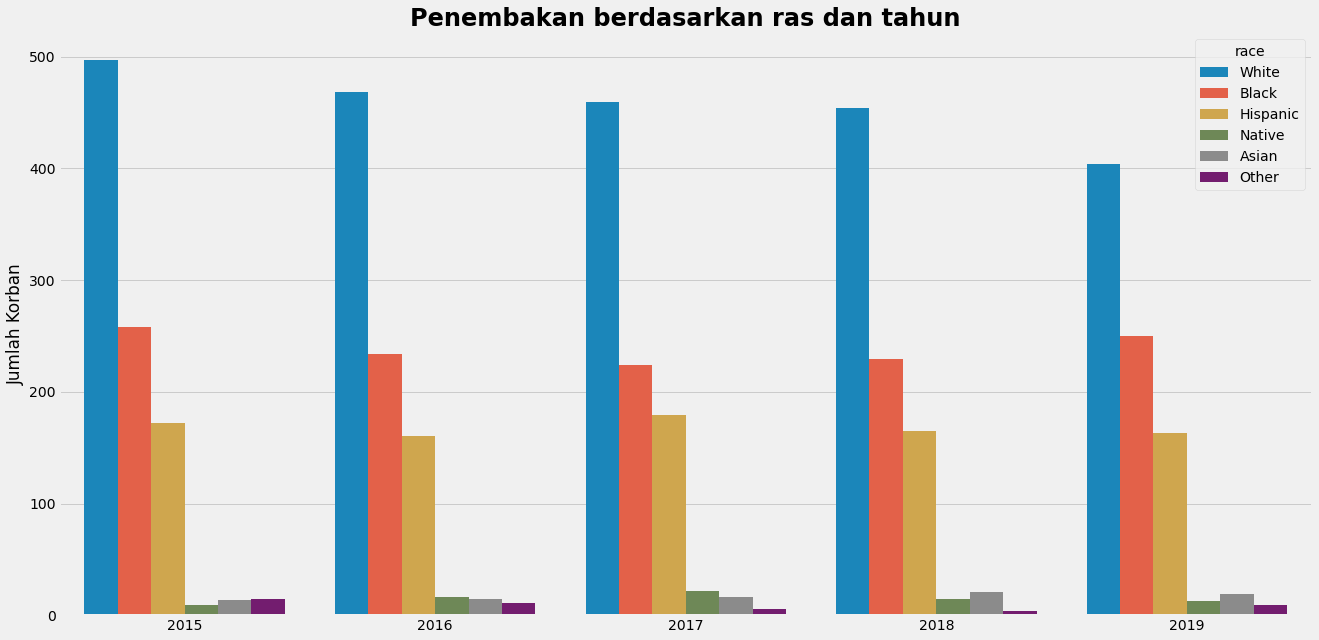

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.barplot(x="year", y="count",hue="race", data=race_df)
plt.title('Penembakan berdasarkan ras dan tahun', fontsize=24, fontweight='bold')
plt.ylabel('Jumlah Korban')
plt.xlabel('')
plt.show()

* If we talk about Race, then we can see that every year the count of killings in White Race is much larger than other races
* The above chart proves that the most people are from White race, then Black and then from Hispanic Race

In [27]:
fig = go.Figure([go.Pie(labels=race_df['race'],values=race_df['count'], hole = 0.6)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Racial Propotions in Shootings",title_x=0.5)
fig.show()

# <font color="violet"><b>Killings by Race by Age

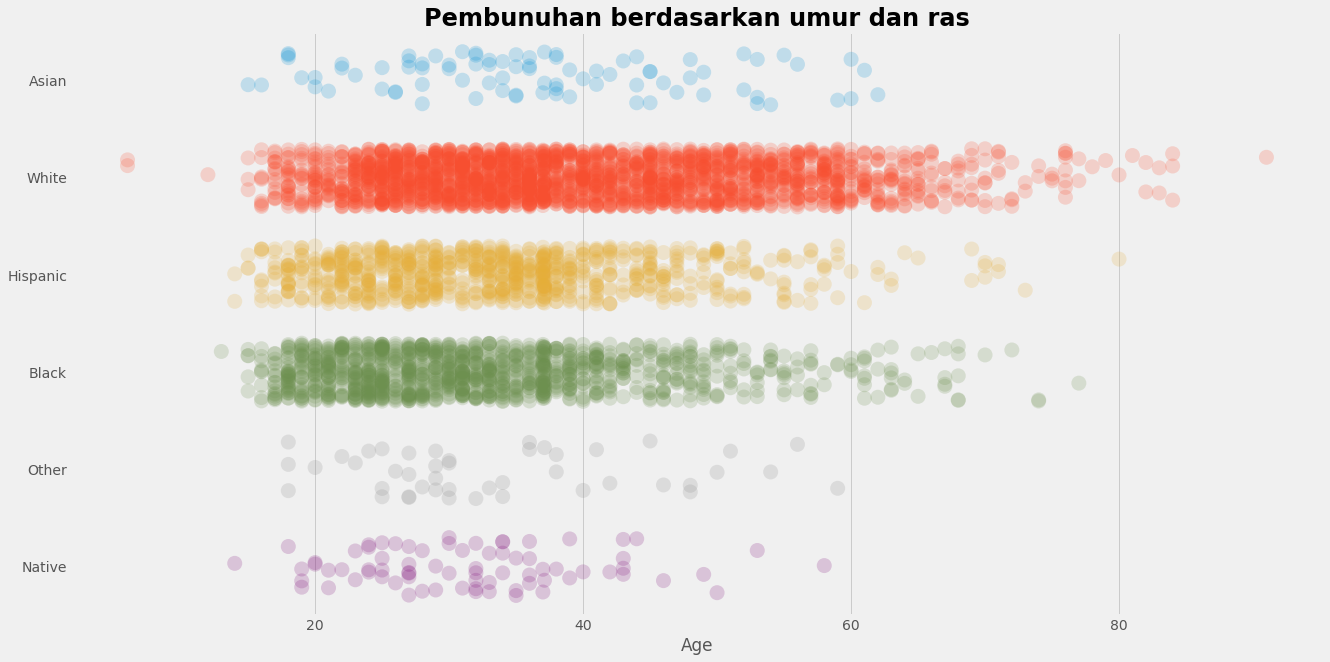

In [34]:
plt.style.use('fivethirtyeight')
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(
    data=data, x="age", y="race",s=15,
    alpha=0.20,jitter=0.30
)
plt.title('Pembunuhan berdasarkan umur dan ras', fontsize=24, fontweight='bold')
plt.ylabel('')
plt.xlabel('Age')
plt.show()

* We can see that In Native, Other and Asian Race the age primarily lies in range 20-60
* The cases of age Above 60 years usually falling in White Race 
* Let's find out the media ages by different races

# <font color="violet"><b>Killing by Race (Monthly Average)

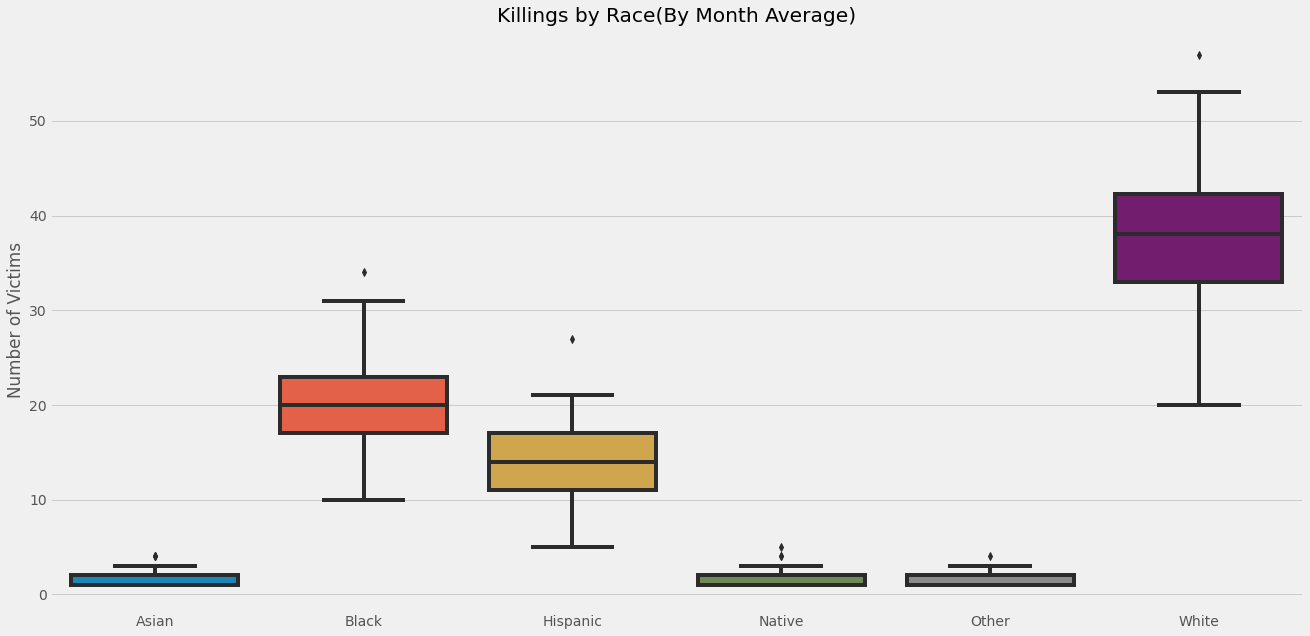

In [35]:
killings_by_race =data.groupby(['year','month_year','race']).count()['id'].reset_index()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.boxplot(x=killings_by_race['race'],y=killings_by_race['id'],dodge=False)
plt.title('Killings by Race(By Month Average)')
plt.ylabel('Number of Victims')
plt.xlabel('')
plt.show()

* On Average 37 White people get shot every Month
* On Average 19 Black people get shot every Month
* On Average 13 Hispanic people get shot every Month

# <font color="violet"><b>Median Age by Race

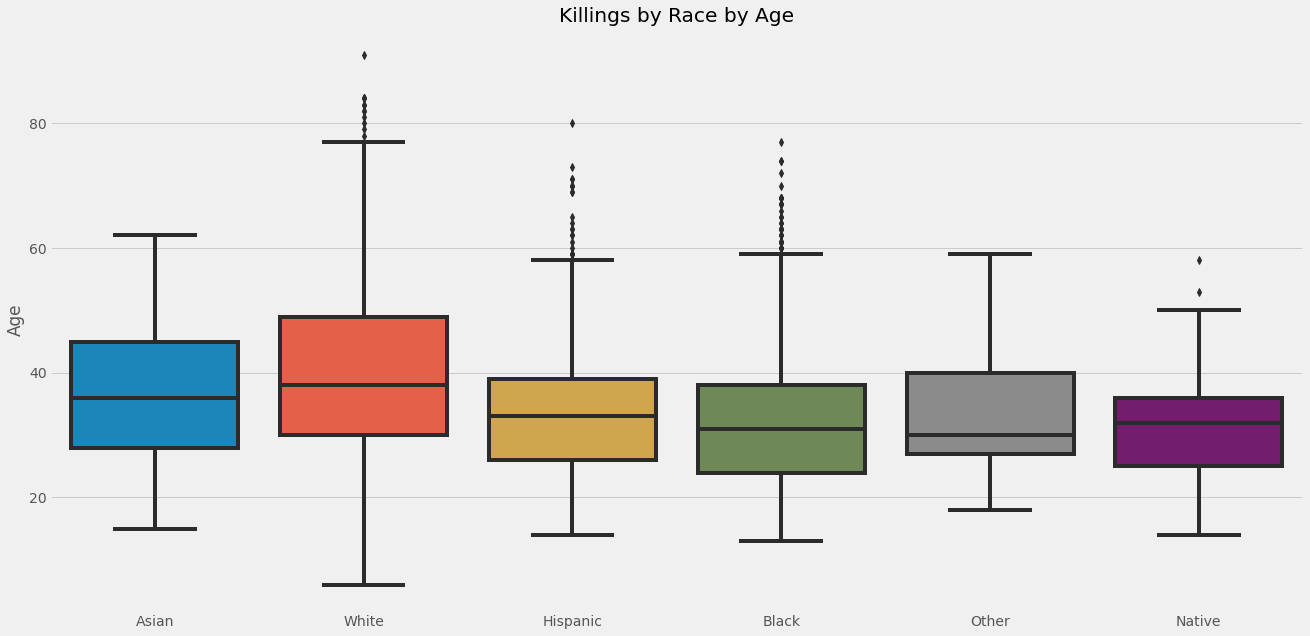

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.boxplot(x=data['race'],y=data['age'],dodge=False)
plt.title('Killings by Race by Age')
plt.ylabel('Age')
plt.xlabel('')
plt.show()

* It is clear from the above graph that Other category is having least meadin age, and then we have Black, Hispanic and then White

# <font color="violet"><b>Let's visualize top 3 races

In [37]:
#Comparing White V/S Black V/S Hispanic
white_black_hispanic = data[data['race']. isin (['Black','White','Hispanic'])]
white_black_hispanic=white_black_hispanic.groupby(['year','race']).agg('count')['id'].to_frame(name='count').reset_index()
white_black_hispanic['year']= white_black_hispanic['year'].astype(str)

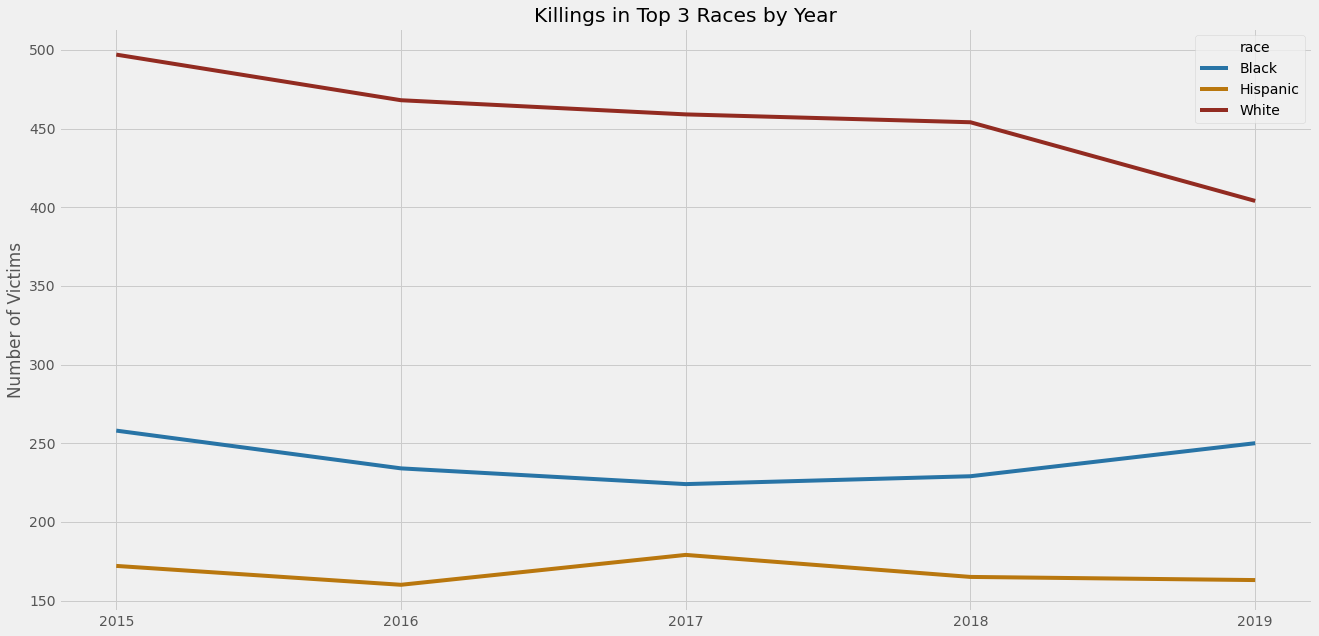

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

colors = ["#2874A6", "#B9770E","#922B21"]
sns.set_palette(sns.color_palette(colors))

sns.lineplot( data=white_black_hispanic,x="year", y="count", hue="race")
plt.title('Killings in Top 3 Races by Year')
plt.ylabel('Number of Victims')
plt.xlabel('')
plt.show()

* We can say that the most number of people shot are from White race and then from Black Race

# <font color="violet"><b>Negara Bagian dengan jumlah kasus terbanyak

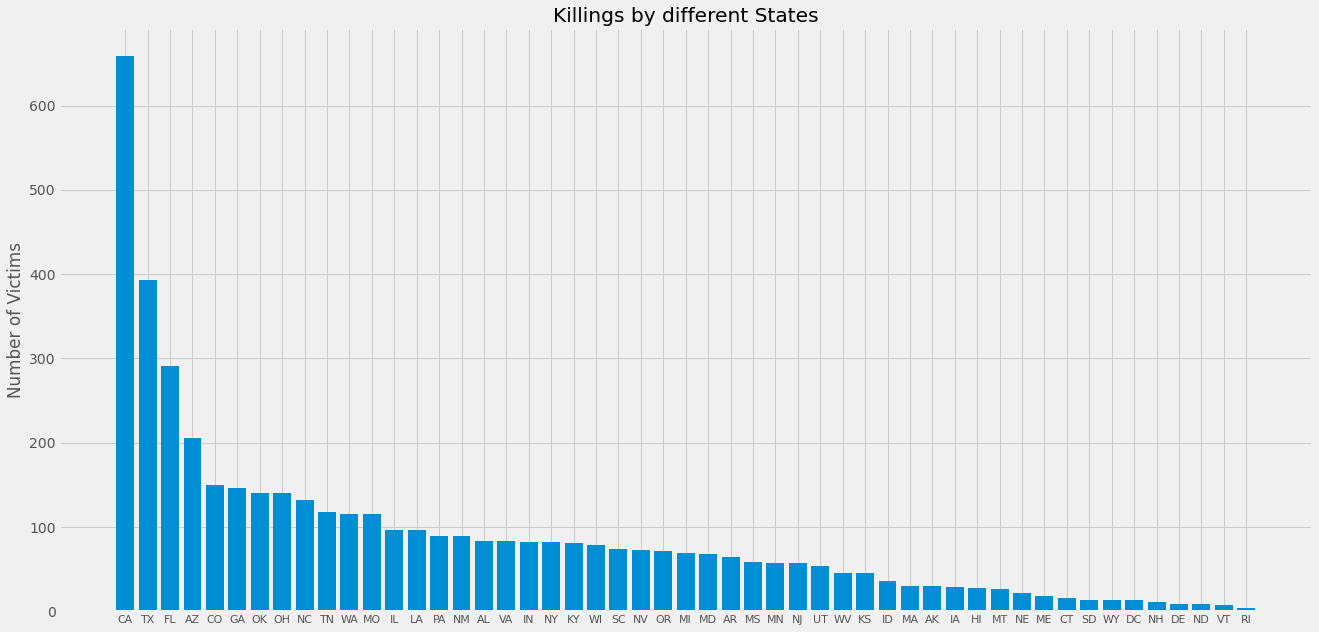

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.bar(data['state'].value_counts().index,data['state'].value_counts().values)
plt.title('Killings by different States')
plt.ylabel('Number of Victims')
plt.xticks(fontsize=11)
plt.show()

* We can see that most of the cases are from California, Texas and Florida

# <font color="violet"><b>Let's look at top 5 states and check whether the person was fleeing or not

In [40]:
top_5_states = data[data['state'] . isin(['CA','TX','FL','AZ','CO'])]
top_5_states = top_5_states.groupby(['state','flee']).agg('count')['id'].to_frame(name='count').reset_index().sort_values('count',ascending=False)

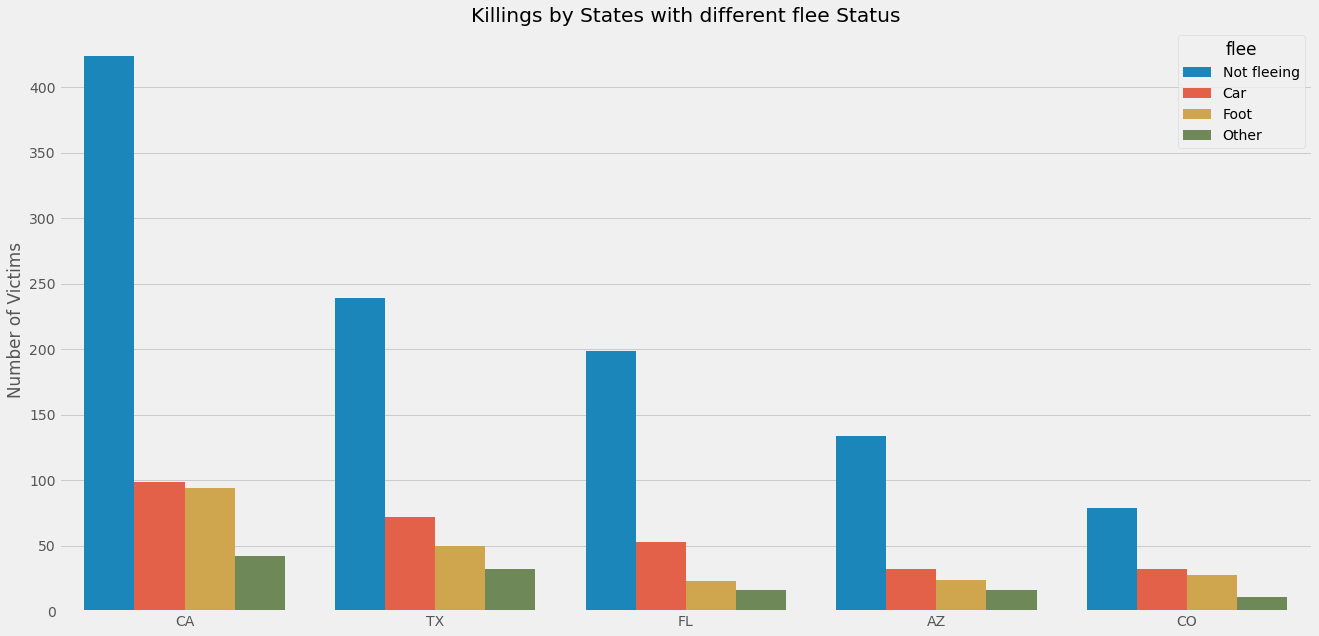

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.barplot(x='state', y='count',hue='flee', data=top_5_states)
plt.ylabel('Number of Victims')
plt.title('Killings by States with different flee Status')
plt.xlabel("")
plt.show()

* It is clear from above chart that most of the people in all top 5 states were not fleeing during the encounter

# <font color="violet"><b>Apakah korban sehat secara mental?
   

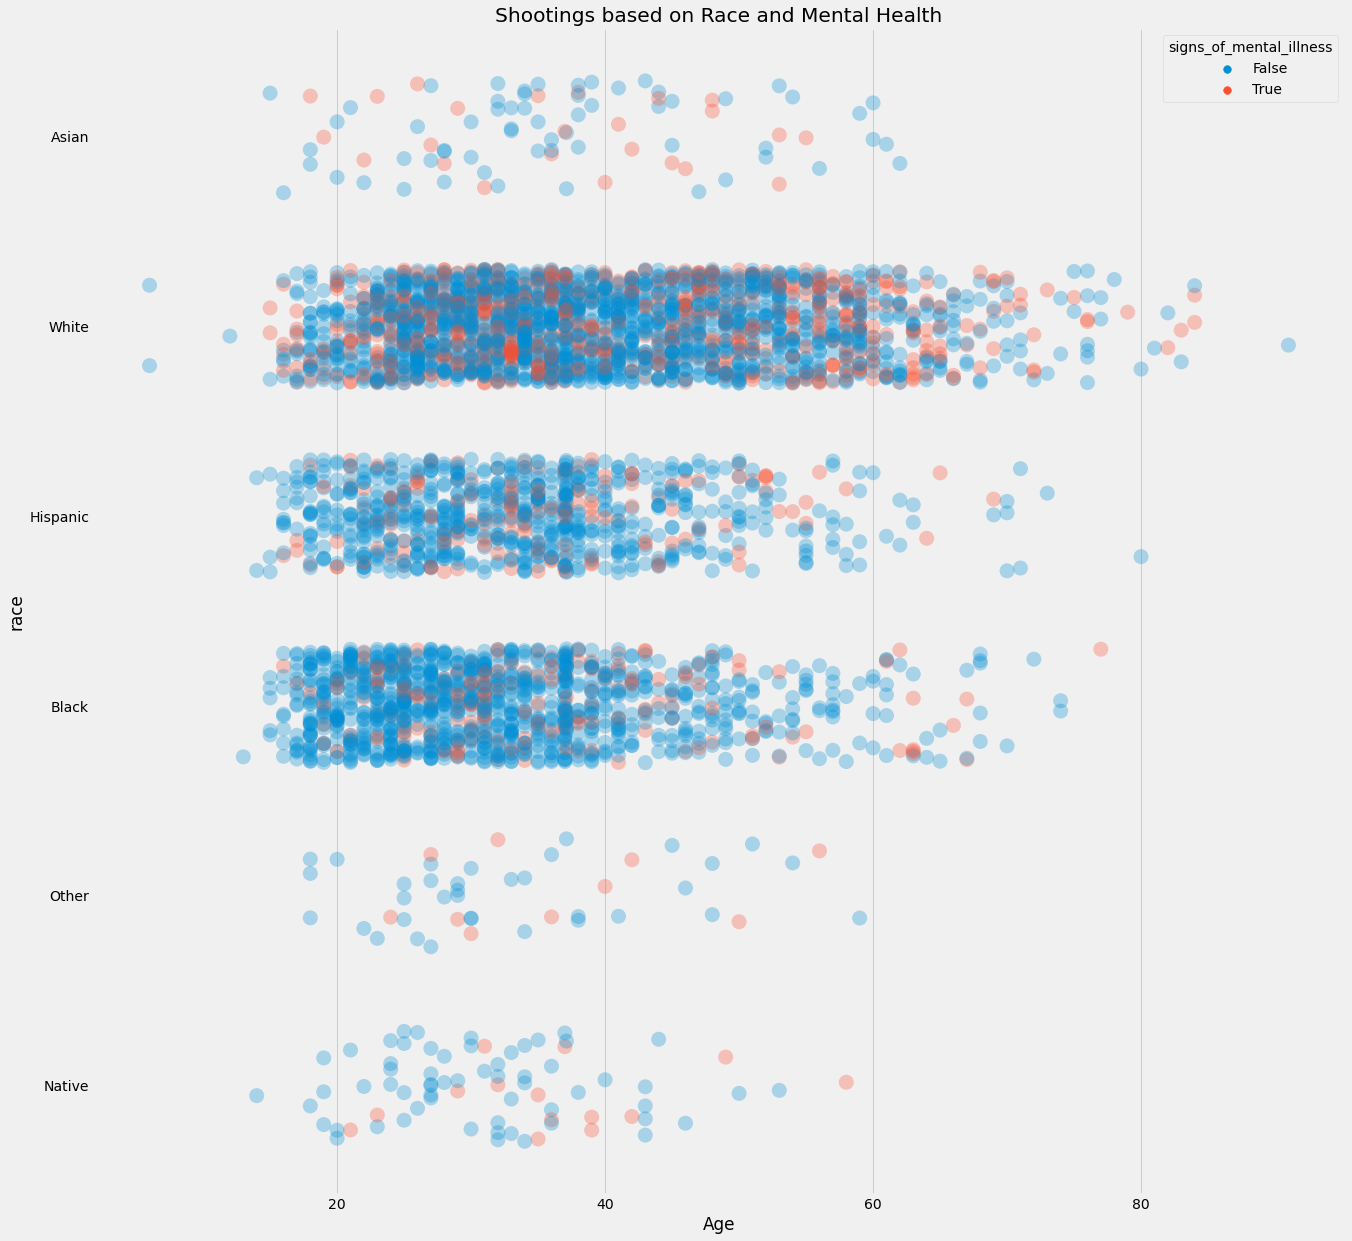

In [32]:
plt.style.use('fivethirtyeight')

fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(
    data=data, x="age", y="race",hue="signs_of_mental_illness",s=15,
    alpha=0.3,jitter=0.30
)
plt.title('Shootings based on Race and Mental Health')
plt.axis('tight')
plt.xlabel('Age')
plt.show()

In [43]:
df=data['signs_of_mental_illness'].value_counts().reset_index().rename(columns={'index':'signs_of_mental_illness','signs_of_mental_illness':'count'})
fig = go.Figure([go.Pie(labels=df['signs_of_mental_illness'],values=df['count'], hole = 0.5)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Ada tanda penyakit mental?",title_x=0.5)
fig.show()

* It looks like most of them were mentally stable. Let's Visualize Top 3 Races i.e Black, White, Hispanic by Pie chart

# <font color="violet">Top 3 Races by Mental Status

In [44]:
#Let's check by pie chart
pie_chart =data.groupby(['race','signs_of_mental_illness']).count()['id'].reset_index()
black_pie_chart = pie_chart[pie_chart['race']=='Black']
white_pie_chart = pie_chart[pie_chart['race']=='White']
hispanic_pie_chart = pie_chart[pie_chart['race']=='Hispanic']

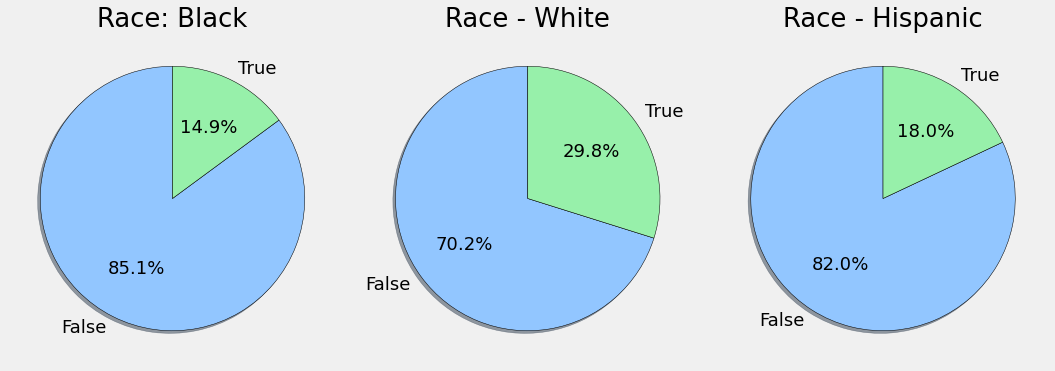

In [45]:
plt.style.use('seaborn-pastel')
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,15))
plt.rcParams.update({'font.size': 18})
ax1.pie(black_pie_chart['id'], labels=black_pie_chart['signs_of_mental_illness'], shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
ax1.set_title("Race: Black")

ax2.pie(white_pie_chart['id'], labels=white_pie_chart['signs_of_mental_illness'], shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
ax2.set_title("Race - White")

ax3.pie(hispanic_pie_chart['id'], labels=hispanic_pie_chart['signs_of_mental_illness'], shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
ax3.set_title("Race - Hispanic")

fig.tight_layout()

plt.show()

Tahun, Jenis Kelamin, Ras

In [28]:
df=data.groupby(['date','gender','race'])['manner_of_death'].count().reset_index()
df['date']=pd.to_datetime(df['date'])
df['year-month'] = df['date'].apply(lambda x: str(x.year))
df_ym=df.groupby(['year-month','gender','race'])[['manner_of_death']].sum().reset_index()
df_ym['year-month']=pd.to_datetime(df_ym['year-month'])
df_ym=df_ym.sort_values('year-month')
df_ym['year-month']=df_ym['year-month'].astype('str').apply(lambda x: x.split('-')[0])

fig = px.sunburst(df_ym, path=['year-month','gender','race'], values='manner_of_death')
fig.update_layout(title="Number of deaths  by Gender,year,race",title_x=0.5)
fig.show()

/Users/sarthakchawla/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/sarthakchawla/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/sarthakchawla/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Apakah Polisi terancam?

In [47]:
df=data['threat_level'].value_counts().reset_index().rename(columns={'index':'threat_level','threat_level':'count'})
fig = go.Figure([go.Pie(labels=df['threat_level'],values=df['count'], hole = 0.5)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="threat_level",title_x=0.5)
fig.show()

Police Shootings of Black People in States

In [29]:
black_state=data[data['race']=='Black']['state'].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'})

fig = go.Figure(go.Choropleth(
    locations=black_state['state'],
    z=black_state['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=black_state['state'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD",showscale = False,
))
fig.update_layout(title_text='US Police shooting cases of black people',    title_x=0.5,
    geo = dict( scope='usa', projection=go.layout.geo.Projection(type = 'albers usa'), showlakes=True, 
               lakecolor='rgb(255, 255, 255)'))
fig.update_layout(template="simple_white")
fig.show()

Police Shootings of White People in States

In [30]:
white_state=data[data['race']=='White']['state'].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'})

fig = go.Figure(go.Choropleth(
    locations=white_state['state'],
    z=white_state['count'].astype(float),
    locationmode='USA-states',
    colorscale='Greens',
    autocolorscale=False,
    text=black_state['state'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD",showscale = False,
))
fig.update_layout(title_text='US Police shooting cases of White people',    title_x=0.5,
    geo = dict( scope='usa', projection=go.layout.geo.Projection(type = 'albers usa'), showlakes=True, 
               lakecolor='rgb(255, 255, 255)'))
fig.update_layout(template="simple_white")
fig.show()

In [31]:
all_state=data[data['state']].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'})

fig = go.Figure(go.Choropleth(
    locations=white_state['state'],
    z=white_state['count'].astype(float),
    locationmode='USA-states',
    colorscale='Greens',
    autocolorscale=False,
    text=black_state['state'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD",showscale = False,
))
fig.update_layout(title_text='US Police shooting cases of White people',    title_x=0.5,
    geo = dict( scope='usa', projection=go.layout.geo.Projection(type = 'albers usa'), showlakes=True, 
               lakecolor='rgb(255, 255, 255)'))
fig.update_layout(template="simple_white")
fig.show()

KeyError: "None of [Index(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'KS', 'IA', 'PA',\n       ...\n       'CA', 'TX', 'KS', 'MO', 'AZ', 'MO', 'AR', 'WA', 'NE', 'WV'],\n      dtype='object', length=4521)] are in the [columns]"